In [30]:
import numpy as np
import matplotlib.pyplot as plt
from cicTools import *
from scipy import spatial
import random 

r = 7000
lbox = 256000
V = lbox**3

gxs = readTNG()
#gxs = np.column_stack(random.choices(gxs['x','y','z'].as_array(),k=100000))[0]
#ids = np.random.choice(len(gxs),size=10000)
#gxs = gxs[ids]
ntot = len(gxs)

pos = np.column_stack((gxs['x'],gxs['y'],gxs['z']))
pos = pos[:round(len(pos)*.0113)]
ntot = len(pos)
print()

tree = spatial.cKDTree(pos)
print('N_tot =',ntot)
print('Mean interparticle distance:',(V/ntot)**(1/3))
print('Wigner-Seitz radius:',(3*V/(4*np.pi*ntot))**(1/3))
print('Testing radius:',r)



N_tot = 150670
Mean interparticle distance: 4810.952133179838
Wigner-Seitz radius: 2984.476517511628
Testing radius: 7000


In [31]:

ns = np.geomspace(100,10000,10).astype(int)

P0 = np.zeros(len(ns))
N_mean = np.zeros(len(ns))
xi_mean = np.zeros(len(ns))
chi = np.zeros(len(ns))
NXi = np.zeros(len(ns))
chi_std = np.zeros(len(ns))
NXi_std = np.zeros(len(ns))
P0_std = np.zeros(len(ns))
N_mean_std = np.zeros(len(ns))
xi_mean_std = np.zeros(len(ns))

for i,n in enumerate(ns):
    print(i)
    #chi[i], NXi[i], P0[i], N_mean[i], xi_mean[i] = cic_stats(ran_tree, n, r, lbox)
    chi[i], NXi[i], P0[i], N_mean[i], xi_mean[i], \
            chi_std[i], NXi_std[i], P0_std[i], N_mean_std[i], xi_mean_std[i] = cic_stats_jk(tree, n, r, lbox-r, jkbins=3)


0
1
2
3
4
5
6
7
8
9


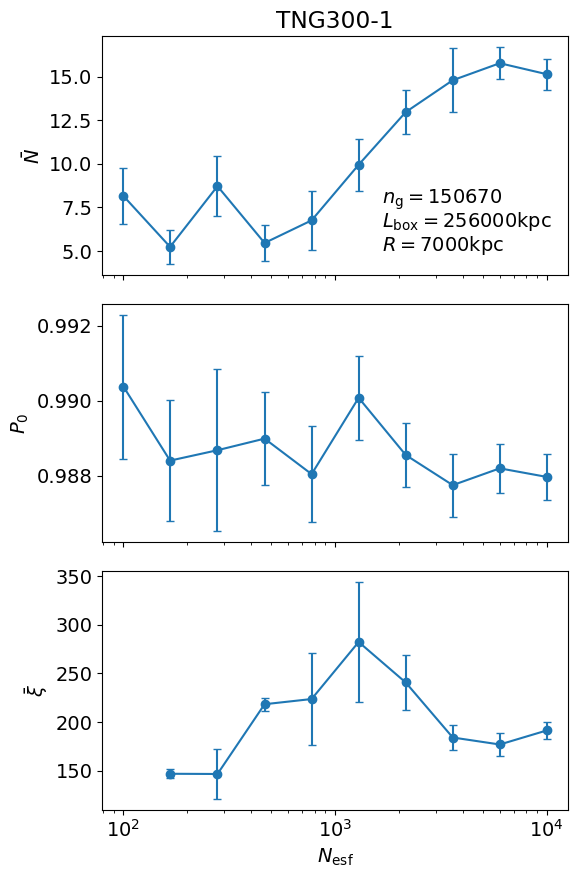

In [32]:

# namefile = '../data/stability_tng300-1_jk.npz'

# np.savez(namefile,chi, NXi, P0, N_mean, xi_mean, \
#     chi_std, NXi_std, P0_std, N_mean_std,xi_mean_std)


#
#Estos son los plots con JK
#
# r = 800
# lbox = 205000
# V = lbox**3

fig= plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.get_shared_x_axes().join(ax1, ax2, ax3)
plt.rcParams['font.size'] = 14

"""
Nmean
"""
#N_mean_analytical = len(pos)*(4*np.pi*r**3/3)/V
#ax1.hlines(N_mean_analytical,np.min(ns),np.max(ns),ls=':',color='k')
ax1.errorbar(ns,N_mean,yerr=N_mean_std,marker='o',capsize=3)
#ax1.plot(ns,N_mean)

ax1.text(.6,.3,r'$n_\mathrm{g}=$'+f'{len(pos)}', transform=ax1.transAxes)
ax1.text(.6,.1,r'$R=$'+f'{r}kpc', transform=ax1.transAxes)
ax1.text(.6,.2,r'$L_\mathrm{box}=$'+f'{lbox}kpc', transform=ax1.transAxes)

ax1.set_ylabel(r'$\bar{N}$')
ax1.set_xscale('log')

"""
P0
"""
ax2.errorbar(ns,P0,yerr=P0_std,marker='o',capsize=3)

ax2.set_ylabel(r'$P_0$')
ax2.set_xscale('log')

"""
Xi_mean
"""
ax3.errorbar(ns,xi_mean,yerr=xi_mean_std,marker='o',capsize=3)

ax3.set_xlabel(r'$N_\mathrm{esf}$')
ax3.set_ylabel(r'$\bar{\xi}$')
ax3.set_xscale('log')

ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax1.set_title('TNG300-1')
plt.tight_layout()
#plt.savefig('../plots/stability_tng300-1_jk.png')
plt.show()

